### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.signal import lfilter

from kalman_filter import KalmanFilter
from extended_kalman_filter import ExtendedKalmanFilter

### Aufgabe 1

### Aufgabe 2

In [ ]:
def correlate(x, y): 
    """
    correlates x with y
    
    ! moves y !
    """
    rxy = np.correlate(y, x, 'full')
    lags = np.arange(-len(y)+1, len(x), dtype=int)[::-1]

    return np.column_stack((lags, rxy))

In [50]:
x = np.array([2,0,-3,1,4,4,2,-2,-4,-4], dtype=float)
print(np.mean(x))

print(correlate(x,x))
print(-14/8)

print(np.sum(x[:-2]*x[2:]))

0.0
[[  9.  -8.]
 [  8.  -8.]
 [  7.   8.]
 [  6.  12.]
 [  5.  -6.]
 [  4. -32.]
 [  3. -40.]
 [  2. -14.]
 [  1.  45.]
 [  0.  86.]
 [ -1.  45.]
 [ -2. -14.]
 [ -3. -40.]
 [ -4. -32.]
 [ -5.  -6.]
 [ -6.  12.]
 [ -7.   8.]
 [ -8.  -8.]
 [ -9.  -8.]]
-1.75
-14.0


In [34]:
z = np.array([-1.1, -3.1, -3.1, 8.0, -2.8, -4.9, 0.6, -1.7, -2.8, -0.6, 8.0, -2.1, -2.2, -1.7, -1.9])
print(np.median(z))

-1.9


### Aufgabe 3

mu_max = 0.5
b = [ 1. -1.]
0.0


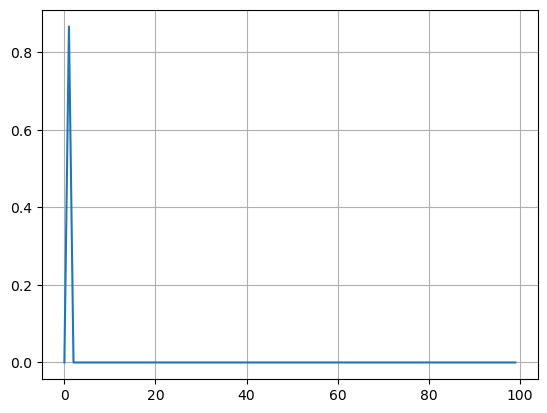

In [ ]:
N_FIR = 1   # filter ordnung
N_Iter = 100  # lms iterationen
mu_max = 1 / (N_FIR + 1) # maximale learnrate
print(f'mu_max = {mu_max}')

enable_print = False

# learnrate
mu = 0.1*mu_max
mu = 0.1

# init vektoren
b = np.array([1,-1], dtype=float)
e = np.zeros(N_Iter)
y = np.zeros(N_Iter)

# soll signal
d = np.array([0, 0.866, 0.866, 0, -0.866, -0.866])
d = np.tile(d, 50)

# input signal
x = np.concatenate(([0,0], d))
#x = np.array([0, 0], dtype=float)
x = np.array([x[start:start+N_FIR+1] for start in np.arange(len(x)-N_FIR)])
x = x[:, ::-1]

#print(x)

# lms
for n in range(N_Iter):
    # calc y[n]
    y[n] = b@x[n]

    # calc e[n]
    e[n] = d[n] - y[n]
    
    if enable_print:
        print(f'Iteration {n}:')
        print(f'\tx[{n}] = {x[n]}')
        print(f'\tb[{n}] = {b}')
        print(f'\ty[{n}] = {y[n]}')
        print(f'\td[{n}] = {d[n]}')
        print(f'\te[{n}] = {e[n]}')
        print()
    
    # calc b[n]
    b += 2*mu*e[n]*x[n]

plt.figure()
plt.plot(e)
#plt.plot(d)
plt.grid(True)


print(f'b = {b}')

### Aufgabe 4


In [46]:
N_FIR = 2 # filter ordnung

# soll signal
d = np.array([0, 0, -0.45, -0.45, 0.85, 0.60, -0.70, 0.35])

# input signal
x = np.array([0, 0, -0.90, -0.90, 0.80, 0.30, -0.60, 1.00], dtype=float)
x = np.array([x[start:start+N_FIR+1] for start in np.arange(len(x)-N_FIR)])
x = x[:, ::-1]

print(x)

# bls
bls = np.linalg.pinv(x)@d[2:]

print(bls)

y = x@bls
print(y)
e = np.sqrt(np.mean((y - d[2:])**2))
print(e)

[[-0.9  0.   0. ]
 [-0.9 -0.9  0. ]
 [ 0.8 -0.9 -0.9]
 [ 0.3  0.8 -0.9]
 [-0.6  0.3  0.8]
 [ 1.  -0.6  0.3]]
[ 5.00000000e-01  5.55111512e-17 -5.00000000e-01]
[-0.45 -0.45  0.85  0.6  -0.7   0.35]
4.970237561727503e-16


### Aufgabe 5


In [17]:
Ts = 1

A = np.array([[1, Ts], [0, 1]], dtype=float)
C = np.array([[0, 1]], dtype=float)
P = 10 * np.eye(2)
print(P)

x = np.array([[0], [15]], dtype=float)

print(A@x)
print(A @ P @ A.T)

[[10.  0.]
 [ 0. 10.]]
[[15.]
 [15.]]
[[20. 10.]
 [10. 10.]]


In [18]:
K = np.array([[0.7143], [0.7143]])
x = A@x
x = x + K*(10 - x[1])
print(x)


[[11.4285]
 [11.4285]]


### Aufgabe 6

In [19]:
def relu(X):
    return np.where(X>0, X, 0)

def diffRelu(X):
    return (X >= 0)*1

def sigmoid(X):
    return 1/(1 + np.exp(-X))

def diffSigmoid(X):
    return sigmoid(X) * (1 - sigmoid(X))

def MSELoss(y, d):
    return 0.5*(d - y)**2

def diffMSELoss(y, d):
    return y - d

def LogisticLoss(y, d):
    return -(d * np.log(y) + (1-d)*np.log(1-y))

def diffLogisticLoss(y, d):
    return - d/y + (1-d)/(1-y)


In [21]:
y = sigmoid(1)
print(y)

print(LogisticLoss(y, 1))

0.7310585786300049
0.3132616875182228


In [25]:
dl = diffLogisticLoss(y, 1)
print(dl)

dv = diffSigmoid(1)
print(dv)

db = dl*dv
print(db)

-1.3678794411714423
0.19661193324148185
-0.2689414213699951
